In [2]:
using CSV
using DataFrames
using Plots
using StatsPlots
using Statistics

using ScikitLearn
using ScikitLearn: fit!, predict
@sk_import linear_model: LogisticRegression

using Lathe
using Lathe.preprocess: TrainTestSplit
using GLM
using CategoricalArrays

In [1]:
ENV["COLUMNS"]

"80"

In [4]:
ENV["COLUMNS"] = 630

630

In [3]:
datos = CSV.read("../../datos/hotel_bookings.csv", DataFrame)
first(datos,10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number
,String,Int64,Int64,Int64,String,Int64
1,Resort Hotel,0,342,2015,July,27
2,Resort Hotel,0,737,2015,July,27
3,Resort Hotel,0,7,2015,July,27
4,Resort Hotel,0,13,2015,July,27
5,Resort Hotel,0,14,2015,July,27
6,Resort Hotel,0,14,2015,July,27
7,Resort Hotel,0,0,2015,July,27
8,Resort Hotel,0,9,2015,July,27
9,Resort Hotel,1,85,2015,July,27


In [4]:
describe(datos)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,hotel,,City Hotel,,Resort Hotel,2,,String
2,is_canceled,0.370416,0,0.0,1,,,Int64
3,lead_time,104.011,0,69.0,737,,,Int64
4,arrival_date_year,2016.16,2015,2016.0,2017,,,Int64
5,arrival_date_month,,April,,September,12,,String
6,arrival_date_week_number,27.1652,1,28.0,53,,,Int64
7,arrival_date_day_of_month,15.7982,1,16.0,31,,,Int64
8,stays_in_weekend_nights,0.927599,0,1.0,19,,,Int64
9,stays_in_week_nights,2.5003,0,2.0,50,,,Int64


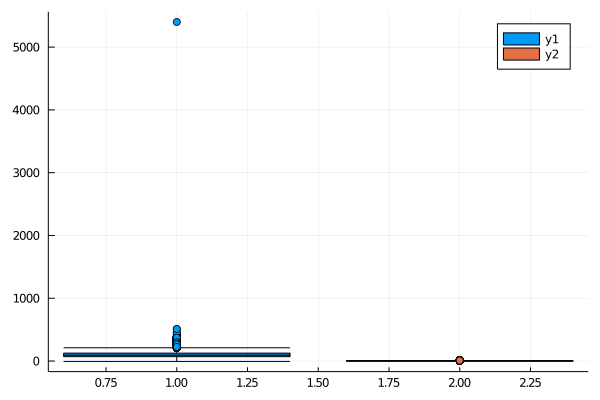

In [8]:
@df datos boxplot([:adr, :stays_in_weekend_nights])

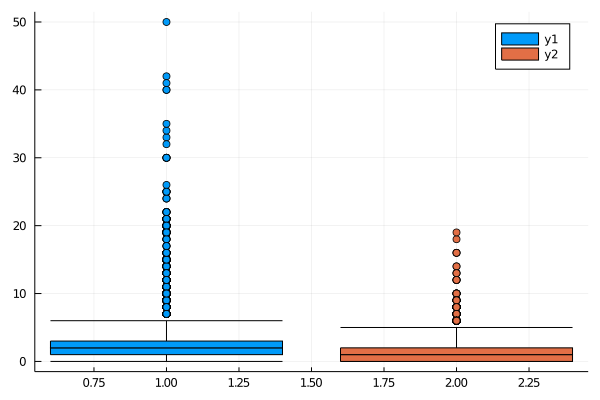

In [9]:
@df datos boxplot([:stays_in_week_nights, :stays_in_weekend_nights])

In [10]:
findall(datos.adr .== 5400.0)

1-element Array{Int64,1}:
 48516

In [5]:
datos = datos[datos.adr.!=5400,:]
first(datos,10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number
,String,Int64,Int64,Int64,String,Int64
1,Resort Hotel,0,342,2015,July,27
2,Resort Hotel,0,737,2015,July,27
3,Resort Hotel,0,7,2015,July,27
4,Resort Hotel,0,13,2015,July,27
5,Resort Hotel,0,14,2015,July,27
6,Resort Hotel,0,14,2015,July,27
7,Resort Hotel,0,0,2015,July,27
8,Resort Hotel,0,9,2015,July,27
9,Resort Hotel,1,85,2015,July,27


In [14]:
unique(datos.country)

178-element Array{String,1}:
 "PRT"
 "GBR"
 "USA"
 "ESP"
 "IRL"
 "FRA"
 "NULL"
 "ROU"
 "NOR"
 "OMN"
 "ARG"
 "POL"
 "DEU"
 ⋮
 "GUY"
 "LCA"
 "ATA"
 "GTM"
 "ASM"
 "MRT"
 "NCL"
 "KIR"
 "SDN"
 "ATF"
 "SLE"
 "LAO"

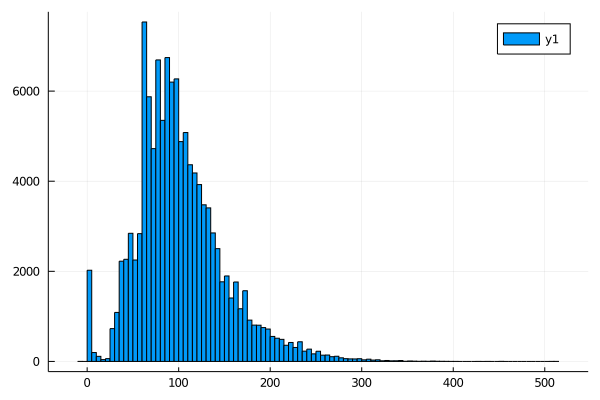

In [6]:
histogram(datos.adr)

## Faltantes

In [65]:
sum(ismissing.(datos.agent))

0

In [66]:
sum(datos.agent .== "NULL")

16340

In [72]:
findall(unique(datos.agent) .== "0")

Int64[]

In [78]:
datos[:agent] = map(e -> replace(e, "NULL"=>"0"), datos[:agent]) 
sum(datos.agent .== "NULL")

0

In [79]:
sum(datos.company .== "NULL")

112592

In [80]:
datos[:company] = map(e -> replace(e, "NULL"=>"0"), datos[:company]) 
sum(datos.company .== "NULL")

0

In [81]:
sum(datos.country .== "NULL")

488

In [82]:
datos[:country] = map(e -> replace(e, "NULL"=>"0"), datos[:country]) 
sum(datos.country .== "NULL")

0

In [83]:
sum(datos.children .== "NA")

4

In [85]:
datos[:children] = map(e -> replace(e, "NA"=>"0"), datos[:children]) 
sum(datos.children .== "NA")

0

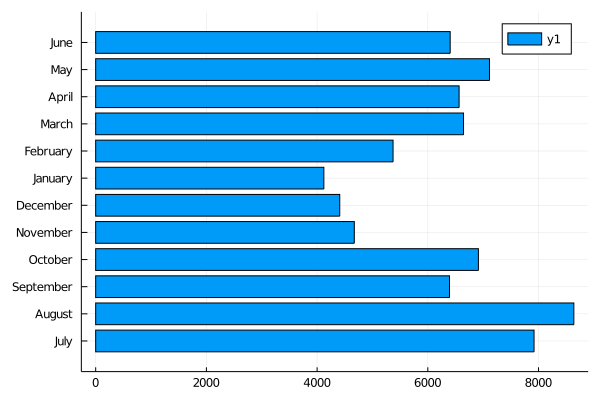

In [37]:
datos_not_canceled = datos[datos.is_canceled .== 0,:]
gdf = groupby(datos_not_canceled,:arrival_date_month)
meses = combine(gdf, nrow)
bar(meses.arrival_date_month, meses.nrow, orientation=:h)

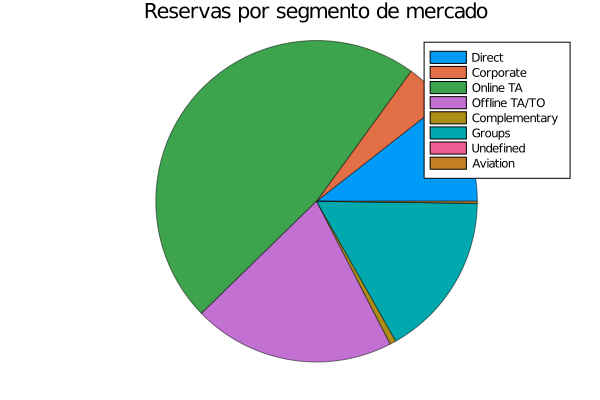

In [43]:
Plots.gr()
gdf = groupby(datos,:market_segment)
ms = combine(gdf, nrow)
pie(ms.market_segment, ms.nrow, title="Reservas por segmento de mercado", l=0.5)

## Modelado

In [78]:
train, test = TrainTestSplit(datos,.75);

### GLM
[GLM.jl](https://juliastats.org/GLM.jl/v1.1/)

In [8]:
fm = @formula(is_canceled ~ total_of_special_requests + required_car_parking_spaces + lead_time)
logit = glm(fm, train, Binomial(), ProbitLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},ProbitLink},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

is_canceled ~ 1 + total_of_special_requests + required_car_parking_spaces + lead_time

Coefficients:
────────────────────────────────────────────────────────────────────────────────────────────────
                                   Coef.  Std. Error       z  Pr(>|z|)    Lower 95%    Upper 95%
────────────────────────────────────────────────────────────────────────────────────────────────
(Intercept)                  -0.424601    0.00733676  -57.87    <1e-99  -0.438981    -0.410221
total_of_special_requests    -0.39162     0.006426    -60.94    <1e-99  -0.404215    -0.379025
required_car_parking_spaces  -4.35745     1.14335      -3.81    0.0001  -6.59837     -2.11653
lead_time                     0.00326706  4.39409e-5   74.35    <1e-99   0.00318094   0.00335319
────────────────

In [10]:
prediction = GLM.predict(logit,test)
prediction_class = [if x < 0.5 0 else 1 end for x in prediction]

prediction_df = DataFrame(y_actual = test.is_canceled, y_predicted = prediction_class, prob_predicted = prediction);
prediction_df.correctly_classified = prediction_df.y_actual .== prediction_df.y_predicted
accuracy = mean(prediction_df.correctly_classified)

0.6923102674835124

### ScikitLearn
[sklearn.jl](https://scikitlearnjl.readthedocs.io/en/latest/)

In [67]:
X_train = train[:, Not(:is_canceled)]
X_train = convert(Matrix, X_train[:,[:total_of_special_requests,:required_car_parking_spaces,:lead_time]])
y_train = train.is_canceled
log_reg = LogisticRegression(C=1.0, dual=false, fit_intercept=true, multi_class="auto", 
                            n_jobs=-1, solver="lbfgs", tol=0.0001)

PyObject LogisticRegression(n_jobs=-1)

In [68]:
ScikitLearn.fit!(log_reg, X_train, y_train)

PyObject LogisticRegression(n_jobs=-1)

In [69]:
X_test = test[:, Not(:is_canceled)]
X_test = convert(Matrix, X_test[:,[:total_of_special_requests,:required_car_parking_spaces,:lead_time]])
y_test = test.is_canceled
score(log_reg, X_test, y_test)

0.6928256405076928

### Mejor modelado?
[CategoricalArrays.jl](https://dataframes.juliadata.org/stable/man/categorical/)

In [58]:
categoricals = [:hotel, :arrival_date_month, :deposit_type, :customer_type, :reservation_status,:agent,
                :assigned_room_type, :company, :country, :distribution_channel, :market_segment, :meal,
                :reservation_status, :reservation_status_date,:reserved_room_type]
for cat ∈ categoricals
    print(cat)
    datos[cat] = CategoricalArray(datos[cat])
end

hotelarrival_date_monthdeposit_typecustomer_typereservation_statusagentassigned_room_typecompanycountrydistribution_channelmarket_segmentmealreservation_statusreservation_status_datereserved_room_type

In [95]:
fm = @formula(is_canceled ~ total_of_special_requests + required_car_parking_spaces + lead_time + customer_type + market_segment + meal + reserved_room_type)
logit = glm(fm, train, Binomial(), ProbitLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},ProbitLink},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

is_canceled ~ 1 + total_of_special_requests + required_car_parking_spaces + lead_time + customer_type + market_segment + meal + reserved_room_type

Coefficients:
───────────────────────────────────────────────────────────────────────────────────────────────────────
                                      Coef.   Std. Error       z  Pr(>|z|)      Lower 95%     Upper 95%
───────────────────────────────────────────────────────────────────────────────────────────────────────
(Intercept)                     -1.08058      0.108264     -9.98    <1e-22    -1.29277      -0.868384
total_of_special_requests       -0.473789     0.00749842  -63.19    <1e-99    -0.488486     -0.459093
required_car_parking_spaces     -4.48124      1.0898       -4.11    <1e-4     -6.6172       -2.34527
lead_time 

In [96]:
prediction = GLM.predict(logit,test)
prediction_class = [if x < 0.5 0 else 1 end for x in prediction]

prediction_df = DataFrame(y_actual = test.is_canceled, y_predicted = prediction_class, prob_predicted = prediction);
prediction_df.correctly_classified = prediction_df.y_actual .== prediction_df.y_predicted
accuracy = mean(prediction_df.correctly_classified)

0.7562991733891047

Otra vez sklearn

In [97]:
X_train = train[:, Not(:is_canceled)]
X_train = convert(Matrix, X_train[:,[:total_of_special_requests,:required_car_parking_spaces,:lead_time, :market_segment]])
y_train = train.is_canceled
log_reg = LogisticRegression(C=1.0, dual=false, fit_intercept=true, multi_class="auto", 
                            n_jobs=-1, solver="lbfgs", tol=0.0001)

PyObject LogisticRegression(n_jobs=-1)

In [98]:
ScikitLearn.fit!(log_reg, X_train, y_train)

LoadError: PyError ($(Expr(:escape, :(ccall(#= /home/oscar/.julia/packages/PyCall/tqyST/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'TypeError'>
TypeError("float() argument must be a string or a number, not 'PyCall.jlwrap'")
  File "/home/oscar/anaconda3/envs/BD/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1342, in fit
    X, y = self._validate_data(X, y, accept_sparse='csr', dtype=_dtype,
  File "/home/oscar/anaconda3/envs/BD/lib/python3.9/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/oscar/anaconda3/envs/BD/lib/python3.9/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/oscar/anaconda3/envs/BD/lib/python3.9/site-packages/sklearn/utils/validation.py", line 795, in check_X_y
    X = check_array(X, accept_sparse=accept_sparse,
  File "/home/oscar/anaconda3/envs/BD/lib/python3.9/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/oscar/anaconda3/envs/BD/lib/python3.9/site-packages/sklearn/utils/validation.py", line 598, in check_array
    array = np.asarray(array, order=order, dtype=dtype)
  File "/home/oscar/anaconda3/envs/BD/lib/python3.9/site-packages/numpy/core/_asarray.py", line 83, in asarray
    return array(a, dtype, copy=False, order=order)


### Lathe (Otra paquetería para ML)
[Lathe.jl](https://juliapackages.com/p/lathe)

In [101]:
?Lathe.preprocess

|====== Lathe.preprocess =====

|____________/ Generalized Processing ___________

|_____preprocess.TrainTestSplit

|_____preprocess.SortSplit

|_____preprocess.UniformSplit

|____________/ Feature Scaling ___________

|_____preprocess.Rescalar

|_____preprocess.ArbitraryRescale

|_____preprocess.MeanNormalization

|_____preprocess.StandardScalar

|____________/ Categorical Encoding ___________

|_____preprocess.OneHotEncoder

|_____preprocess.OrdinalEncoder

|_____preprocess.FloatEncoder

```

```


In [100]:
?Lathe.preprocess.OrdinalEncoder

## Ordinal Encoder

### Description

Ordinally Encodes an array.

---

### Input

OrdinalEncoder(x)

---

#### Positional Arguments

Array{Any} - x:: Array for which the original scaler should be based   off of.

---

### Output

## encoder :: A Lathe Preprocesser object.

### Functions

Preprocesser.predict(xt) :: Returns an ordinally encoded xt.

```

```


In [136]:
oe = Lathe.preprocess.OrdinalEncoder(datos.market_segment)
oe1 = Lathe.preprocess.OrdinalEncoder(datos.reserved_room_type)
oe2 = Lathe.preprocess.OrdinalEncoder(datos.customer_type)

train.market_segment2 = oe.predict(train.market_segment)
train.reserved_room_type2 = oe1.predict(train.reserved_room_type)
train.customer_type2 = oe2.predict(train.customer_type)

89267-element Array{Int64,1}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 4
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [144]:
X_train = train[:, Not(:is_canceled)]
X_train = convert(Matrix, X_train[:,[:total_of_special_requests,:required_car_parking_spaces,:lead_time, 
            :market_segment2, :reserved_room_type2, :customer_type2]])
y_train = train.is_canceled
log_reg = LogisticRegression(C=1.0, dual=false, fit_intercept=true, multi_class="auto", 
                             solver="lbfgs", tol=0.0001, max_iter = 200)

PyObject LogisticRegression(max_iter=200)

In [145]:
ScikitLearn.fit!(log_reg, X_train, y_train)

PyObject LogisticRegression(max_iter=200)

In [146]:
test.market_segment2 = oe.predict(test.market_segment)
test.reserved_room_type2 = oe1.predict(test.reserved_room_type)
test.customer_type2 = oe2.predict(test.customer_type)
X_test = test[:, Not(:is_canceled)]
X_test = convert(Matrix, X_test[:,[:total_of_special_requests,:required_car_parking_spaces,:lead_time,
            :market_segment2,:reserved_room_type2, :customer_type2]])
y_test = test.is_canceled
score(log_reg, X_test, y_test)

0.7254589516316436